# Tarea 3. Análisis de Datos

In [1]:
# Importar las librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Leer archivo de datos
data = pd.read_excel(r'C:\Users\leidy\Desktop\online+retail+ii\online_retail_II.xlsx', sheet_name=None)

# Mostrar datos capturados
data

{'Year 2009-2010':        Invoice StockCode                          Description  Quantity  \
 0       489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
 1       489434    79323P                   PINK CHERRY LIGHTS        12   
 2       489434    79323W                  WHITE CHERRY LIGHTS        12   
 3       489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
 4       489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   
 ...        ...       ...                                  ...       ...   
 525456  538171     22271                 FELTCRAFT DOLL ROSIE         2   
 525457  538171     22750         FELTCRAFT PRINCESS LOLA DOLL         1   
 525458  538171     22751       FELTCRAFT PRINCESS OLIVIA DOLL         1   
 525459  538171     20970   PINK FLORAL FELTCRAFT SHOULDER BAG         2   
 525460  538171     21931               JUMBO STORAGE BAG SUKI         2   
 
                InvoiceDate  Price  Customer ID         Country  
 0

In [3]:
# Concatenar los datos de las hojas del archivo de excel para realizar un solo análisis de los datos
total_data = pd.concat(data.values(), ignore_index=True)

### - Realizar un análisis para determinar el país que más productos consume. Puedes utilizar las columnas "País" y "Cantidad" del conjunto de datos para determinar esto.

In [4]:
# Agrupar los datos por país y las cantidades consumidas, organizados de mayor a menor y mostrando solo el país
# que más productos consume
total_data.groupby('Country')["Quantity"].sum().reset_index().sort_values(by="Quantity", ascending=False).head(1)

,Country,Quantity
40,United Kingdom,8692875


### - Realizar un análisis para identificar los productos más vendidos o los más populares en términos de ganancias o cantidad de ventas.

In [5]:
# Crear una columna que guarda el total de las ventas 
total_data['Total'] = total_data['Quantity'] * total_data['Price']

In [6]:
# Agrupar los datos por Descripción y el Total de Ventas, organizados de mayor a menor y mostrando los primeros 8 productos con
# mayor facturación
total_data.groupby('Description')["Total"].sum().reset_index().sort_values(by="Total", ascending=False).head(8)

,Description,Total
3915,REGENCY CAKESTAND 3 TIER,327813.65
1472,DOTCOM POSTAGE,322647.47
5266,WHITE HANGING HEART T-LIGHT HOLDER,257533.90
2508,JUMBO BAG RED RETROSPOT,148800.64
3294,PARTY BUNTING,147948.50
328,ASSORTED COLOUR BIRD ORNAMENT,131413.85
3261,PAPER CHAIN KIT 50'S CHRISTMAS,121662.14
3689,POSTAGE,112341.00


### - Analizar el conjunto de datos para detectar patrones y tendencias, por ejemplo, identificar si hay picos de ventas durante ciertos meses del año.

In [7]:
# Estandarizar el formato de la fecha
total_data['InvoiceDate'] = pd.to_datetime(total_data['InvoiceDate'], format='%d/%m/%Y')

In [8]:
# Crear las columnas que extraen el mes, trimestre, semestre y año
total_data['Month'] = total_data['InvoiceDate'].dt.month
total_data['Quarter'] = total_data['InvoiceDate'].dt.quarter
total_data['Semester'] = total_data['InvoiceDate'].apply(lambda x: 1 if x.month <= 6 else 2)
total_data['Year'] = total_data['InvoiceDate'].dt.year

#### Esta es una gráfica que muestra el valor total por mes en los años analizados, donde se evidencia qué meses tuvieron una mayor y menor facturación

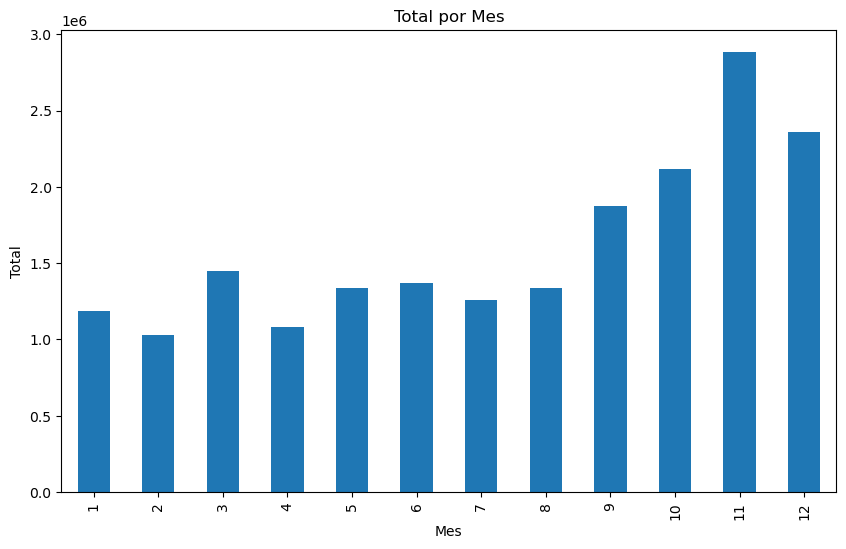

In [44]:
# Graficar total facturado acumulado por mes
plt.figure(figsize=(10,6))
total_data.groupby('Month')['Total'].sum().plot(kind='bar')
plt.title('Total por Mes')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.show()

#### Esta es una gráfica que muestra el comportamiento por mes, trimestre y semestre

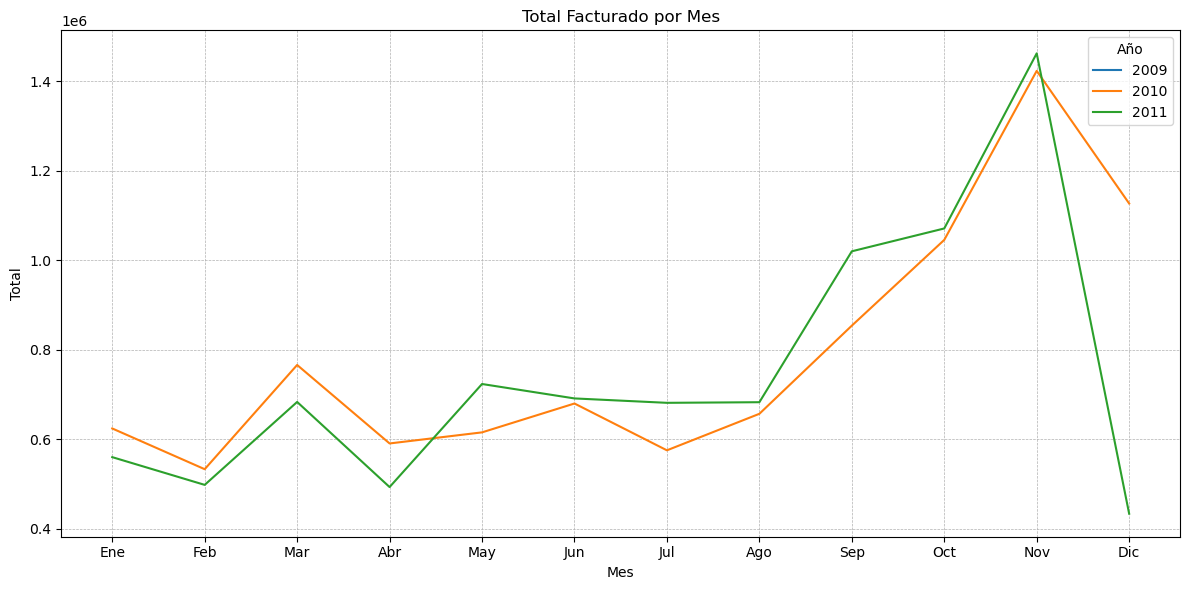

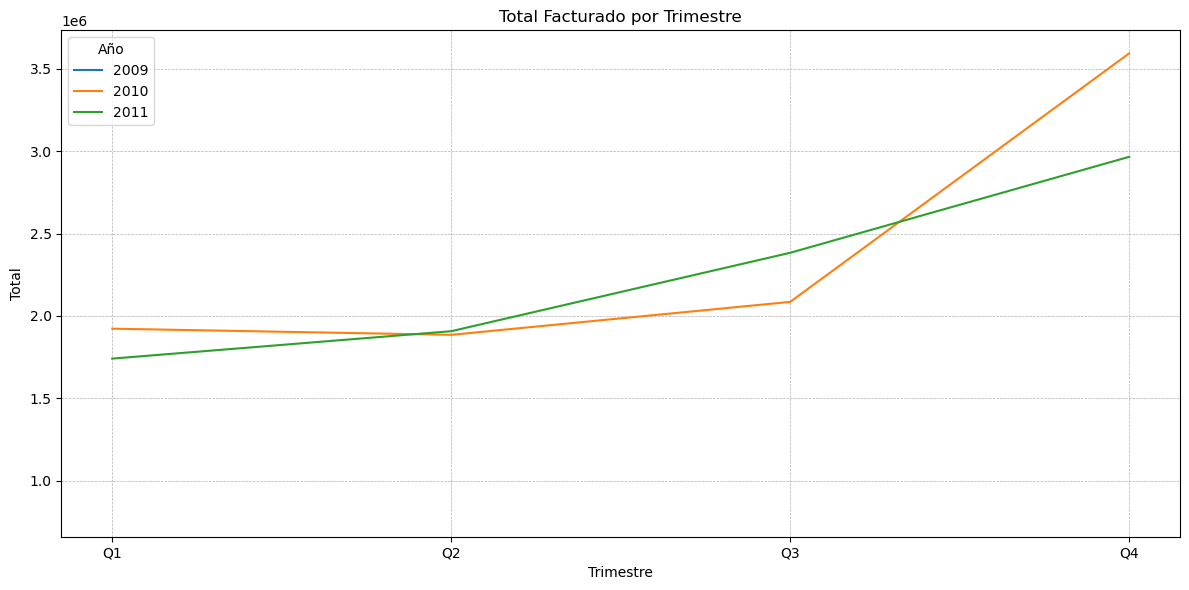

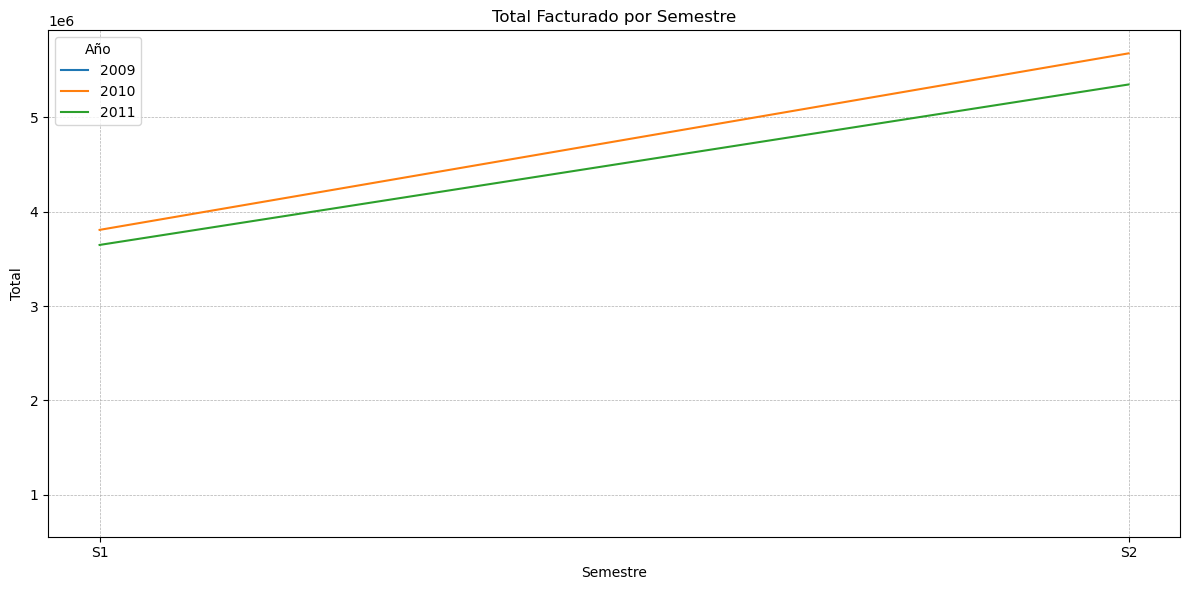

In [9]:
# Graficar para cada año el total facturado por mes, trimestre y semestre
plt.figure(figsize=(12, 6))

for year in total_data['Year'].unique():
    df_year = total_data[total_data['Year'] == year]
    df_year.groupby('Month')['Total'].sum().plot(label=str(year))

plt.title('Total Facturado por Mes')
plt.xlabel('Mes')
plt.ylabel('Total')
plt.legend(title='Año')
plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for year in total_data['Year'].unique():
    df_year = total_data[total_data['Year'] == year]
    df_year.groupby('Quarter')['Total'].sum().plot(label=str(year))

plt.title('Total Facturado por Trimestre')
plt.xlabel('Trimestre')
plt.ylabel('Total')
plt.legend(title='Año')
plt.xticks(range(1, 5), ['Q1', 'Q2', 'Q3', 'Q4'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
for year in total_data['Year'].unique():
    df_year = total_data[total_data['Year'] == year]
    df_year.groupby('Semester')['Total'].sum().plot(label=str(year))

plt.title('Total Facturado por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Total')
plt.legend(title='Año')
plt.xticks(range(1, 3), ['S1', 'S2'])
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()

### - Realizar un análisis de correlación para determinar la relación entre las variables, por ejemplo,si existe una correlación entre el precio y la cantidad de ventas.

<AxesSubplot:>

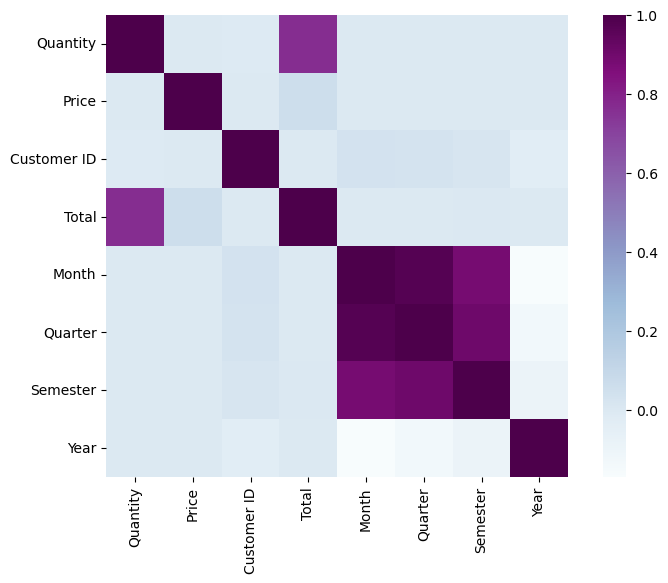

In [10]:
# Crear la gráfica de correlación entre las variables
matrix = total_data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=1, square=True, cmap="BuPu", annot=False)

#### De acuerdo con la matriz de correlación, se puede evidenciar que no existe una correlación entre el precio y la cantidad de ventas:

In [11]:
# Imprimir matriz con valores de correlación
matrix

,Quantity,Price,Customer ID,Total,Month,Quarter,Semester,Year
Quantity,1.000000,-0.001319,-0.005430,0.762623,-0.003463,-0.003502,-0.001784,-0.000947
Price,-0.001319,1.000000,-0.003835,0.061029,-0.000591,-0.001464,-0.001724,-0.000948
Customer ID,-0.005430,-0.003835,1.000000,-0.003122,0.032457,0.027982,0.022406,-0.031163
Total,0.762623,0.061029,-0.003122,1.000000,-0.000151,-0.000465,0.000300,-0.000047
Month,-0.003463,-0.000591,0.032457,-0.000151,1.000000,0.973150,0.881977,-0.168745
Quarter,-0.003502,-0.001464,0.027982,-0.000465,0.973150,1.000000,0.905050,-0.131908
Semester,-0.001784,-0.001724,0.022406,0.000300,0.881977,0.905050,1.000000,-0.089507
Year,-0.000947,-0.000948,-0.031163,-0.000047,-0.168745,-0.131908,-0.089507,1.000000
